In [22]:
from EMPeaks import GaussianMixture
import numpy as np
import pandas as pd

df = pd.read_csv("../data/peak_fit_example.csv")
x = df["x"]
y = df["y"]

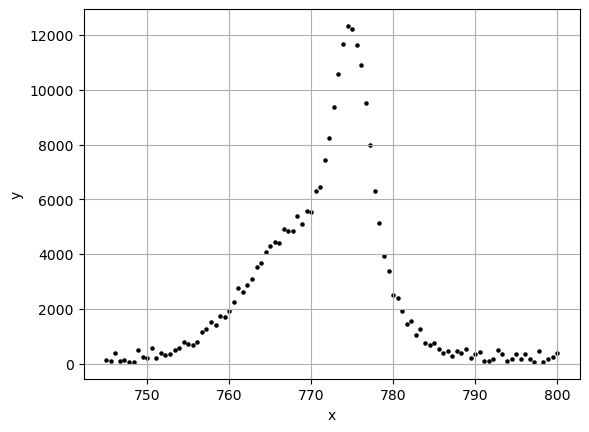

In [37]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color="black", s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

In [24]:
gmm = GaussianMixture.GaussianMixtureModel(K=2)
gmm.fit(x, y)
gmm.sampling(x, y, trial=10)

**** Start spectrum fitting via EM algorithm ****
background: none
<< Start fitting via Adapted EM Algorithm. >>
> iteration #  0, LL=-5.47892580e+06, residual=9.104e-01, elapsed time:  0.01 s
> iteration # 10, LL=-8.85142546e+05, residual=4.052e-05, elapsed time:  0.05 s
> iteration # 20, LL=-8.84897642e+05, residual=2.259e-05, elapsed time:  0.05 s
> iteration # 30, LL=-8.84726834e+05, residual=1.663e-05, elapsed time:  0.06 s
> iteration # 40, LL=-8.84610341e+05, residual=1.039e-05, elapsed time:  0.05 s
> iteration # 50, LL=-8.84543478e+05, residual=5.556e-06, elapsed time:  0.04 s
> iteration # 60, LL=-8.84509364e+05, residual=2.732e-06, elapsed time:  0.05 s
> iteration # 70, LL=-8.84492927e+05, residual=1.296e-06, elapsed time:  0.04 s
> iteration # 80, LL=-8.84485186e+05, residual=6.073e-07, elapsed time:  0.05 s
> iteration # 90, LL=-8.84481568e+05, residual=2.836e-07, elapsed time:  0.05 s
> iteration #100, LL=-8.84479878e+05, residual=1.325e-07, elapsed time:  0.05 s
> itera

{'index_best': 9,
 'LL_hist': array([-869433.78007407, -869433.78070765, -869433.72755332,
        -869433.78169595, -884479.53328861, -869433.74292177,
        -869433.7465305 , -869433.76506493, -869433.79585651,
        -869433.72683273]),
 'RMSE_hist': array([ 309.74537964,  309.74721476,  305.95143352,  309.74957345,
        1243.25450653,  305.9142054 ,  309.65679498,  309.70618933,
         309.78585551,  309.60300135]),
 'time_hist': array([0.45364523, 0.17500043, 0.22303271, 0.30546212, 0.36667132,
        0.26145506, 0.4519906 , 0.33299947, 0.52693534, 0.37419915]),
 'iter_hist': array([ 83,  41,  50,  59,  81,  62, 112,  77, 122,  85]),
 'mu_hist': array([[770.3841813 , 774.77422832],
        [770.38417636, 774.77422185],
        [770.40033951, 774.78486378],
        [770.38416448, 774.77421712],
        [756.62177617, 772.60064775],
        [770.4005087 , 774.78497391],
        [770.38453702, 774.77446513],
        [770.38433856, 774.77433303],
        [770.38401906, 774.77

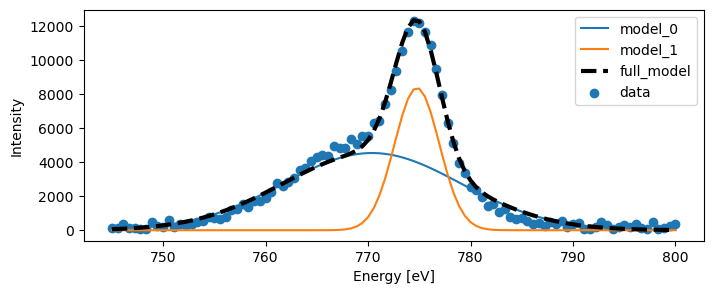

In [25]:
gmm.plot(x, y)

Text(0, 0.5, 'y')

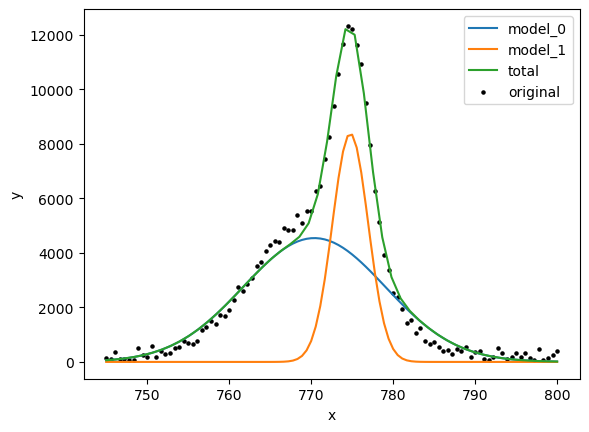

In [36]:
fig = plt.figure()

ax = fig.add_subplot(111)

# plot each peak
for k in range(gmm.K):
    ax.plot(x, gmm.model[k].predict(x) * gmm.N[k], label="model_" + str(k))

# plot total
x_tot = np.linspace(gmm.x_min, gmm.x_max)
y_tot = gmm.predict(x_tot) * gmm.N_tot
ax.plot(x_tot, y_tot, label="total")

# plot fittedd data
ax.scatter(x, y, label="original", color="black", s=5)
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")